We will use BernoulliRBM model to learn data representations in an unspervised manner

In [ ]:
from sklearn.neural_network import BernoulliRBM

In [ ]:
rbm = BernoulliRBM()

The default parameters in the contructor of the RBM are lised as below:


1.   n_components=256. dimension of the input

1.   learning_rate = 0.1 controls the strength of the learning algorithm with respect to updates, and it is recommended to explore it with values in the set {1, 0.1, 0.01, 0.001}
2.   batch_size = 10 controls how many samples are used in the batch-learning algorithm


2.   n_iter=10 controls the number of iterations that are run before we stop learning algorithm. The nature of the algorithm allows it to keeep going as much as we want. However, the algorithm usually finds good solutions in a few iterations.



In [ ]:
from sklearn.neural_network import BernoulliRBM
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
image_size=x_train.shape[1]
original_dim = image_size * image_size
x_train= np.reshape(x_train, [-1, original_dim])
x_test= np.reshape(x_test, [-1, original_dim])

x_train= x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
rbm = BernoulliRBM(verbose=True)
rbm.n_components = 100
rbm.fit(x_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -101.85, time = 17.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -101.45, time = 19.81s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -98.85, time = 19.78s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -98.40, time = 20.09s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -98.28, time = 20.19s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -99.39, time = 19.80s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -99.38, time = 19.60s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -99.14, time = 19.79s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -97.96, time = 19.55s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -100.14, time = 19.49s


BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=10,
             random_state=None, verbose=True)

In [5]:
r = rbm.transform(x_test)

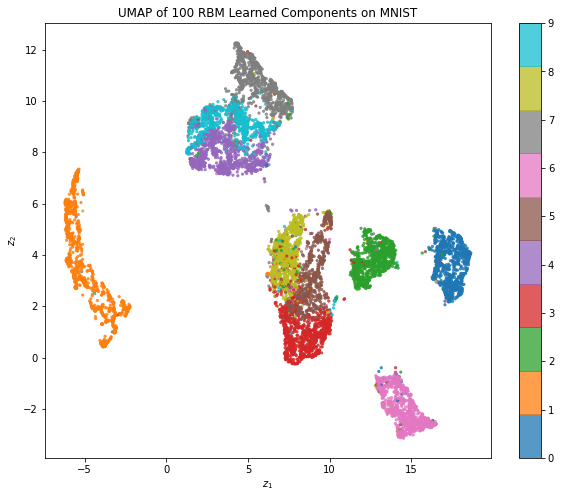

In [6]:
import matplotlib.pyplot as plt
import umap
y_ = list(map(int, y_test))
x_ = rbm.transform(x_test)

x_ = umap.UMAP().fit_transform(x_)
plt.figure(figsize = (10,8))
plt.title('UMAP of 100 RBM Learned Components on MNIST')
plt.scatter(x_[:,0], x_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.colorbar()

In [7]:
v =rbm.components_
# the v variable wil be a 784 x 100 matrix desribing the learned weights

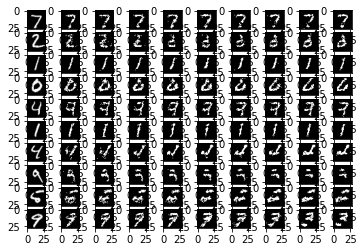

In [9]:
import matplotlib.pyplot as plt
plt.figure()
cnt = 1
for i in range(10):
  x = x_test[i]
  for j in range(10):
    plt.subplot(10,10,cnt)
    plt.imshow(x.reshape((28,28)),cmap='gray')
    x = rbm.gibbs(x) # here use current as input and use as itput again
    cnt+=1
plt.show()